## 1. Business Understanding

 ![alt text](https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fi.forbesimg.com%2Fmedia%2Flists%2Fplaces%2Fseattle-wa_416x416.jpg)

 Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

I fill focus on 5 major questions:

Question 1. Predictive Analysis: Predict the price.

Question 2 Which are the columns the most correlated to the price?

Question 3. How much is the average price over time ? How does it change ?

Question 4. Which are the most expensive property types ?

Question 5. Do the price and host response rate influence the instant bookable policy ?

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

In [ ]:
listings=pd.read_csv('listings.csv')

In [ ]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [ ]:
#choose the columns which are important for the further exploration
data=listings[["id","host_since","host_response_time",
              "host_response_rate","host_acceptance_rate","host_is_superhost",
              "host_listings_count","host_verifications","host_identity_verified","latitude","longitude",
              "property_type","room_type","accommodates","bathrooms","bedrooms",
              "bed_type","amenities","price","guests_included","review_scores_rating",
              "review_scores_cleanliness","instant_bookable","review_scores_value",
               "cancellation_policy","extra_people","cleaning_fee","security_deposit"]]

In [ ]:
data.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,guests_included,review_scores_rating,review_scores_cleanliness,instant_bookable,review_scores_value,cancellation_policy,extra_people,cleaning_fee,security_deposit
0,241032,2011-08-11,within a few hours,96%,100%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,2,95.0,10.0,f,10.0,moderate,$5.00,NaN,NaN
1,953595,2013-02-21,within an hour,98%,100%,t,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,1,96.0,10.0,f,10.0,strict,$0.00,$40.00,$100.00
2,3308979,2014-06-12,within a few hours,67%,100%,f,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,10,97.0,10.0,f,10.0,strict,$25.00,$300.00,"$1,000.00"
3,7421966,2013-11-06,NaN,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,1,NaN,NaN,f,NaN,flexible,$0.00,NaN,NaN
4,278830,2011-11-29,within an hour,100%,NaN,f,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,6,92.0,9.0,f,9.0,strict,$15.00,$125.00,$700.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3818 non-null   int64  
 1   host_since                 3816 non-null   object 
 2   host_response_time         3295 non-null   object 
 3   host_response_rate         3295 non-null   object 
 4   host_acceptance_rate       3045 non-null   object 
 5   host_is_superhost          3816 non-null   object 
 6   host_listings_count        3816 non-null   float64
 7   host_verifications         3818 non-null   object 
 8   host_identity_verified     3816 non-null   object 
 9   latitude                   3818 non-null   float64
 10  longitude                  3818 non-null   float64
 11  property_type              3817 non-null   object 
 12  room_type                  3818 non-null   object 
 13  accommodates               3818 non-null   int64

From the very first look it is clear that data is not clean. As the target variable for these analyses is "price" that is why i will start cleaning it.

In [ ]:
#delete $ in price with and change its data type
data['price'] = data['price'].str.replace(',', '').str.replace('$', '').astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#change 'host_since' object  type into date
data["host_since"]=pd.to_datetime(data["host_since"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data["host_since"].isnull().sum()

2

just drop the null values they are not many

In [ ]:
data['host_since']=data['host_since'].dropna()
#drop the null 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data["host_response_time"].unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

host resonse time has text values so it is much functional to have numerical data for time. First i will replace with some numerical values and then change the data type

In [ ]:
replace_values = {'within a few hours': '2','within an hour': '1','within a day': '3','a few days or more': '4'} 
data = data.replace({"host_response_time": replace_values})  #replace with numerical data  
data["host_response_time"]=data["host_response_time"].astype(float)#change the data type

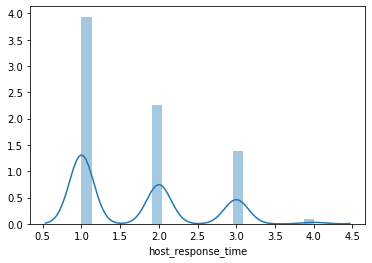

In [ ]:
sns.distplot(data["host_response_time"])

It is clear many hosts respond within an hour

In [ ]:
data["host_response_time"].fillna(data["host_response_time"].mode()[0],inplace=True)
#fill na with mode to have the values with the most frequently value

In [ ]:
#fill na with mode because there most of the repeated value is not the mean
data["host_response_rate"].fillna(data["host_response_rate"].mode()[0],inplace=True)

In [ ]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%', '').str.replace('$', '').astype(float)
#delete % and change the data type

In [ ]:
data['extra_people'] = data['extra_people'].str.replace('%', '').str.replace('$', '').astype(float)
#delete $ and change thedata tpe

In [ ]:
del data['host_acceptance_rate']
#delete this because multicollinearity can happen with host_acceptance_rate

In [ ]:
data['host_response_rate'] = data['host_response_rate'].str.replace('%', '').str.replace('$', '').astype(float)
#delete $

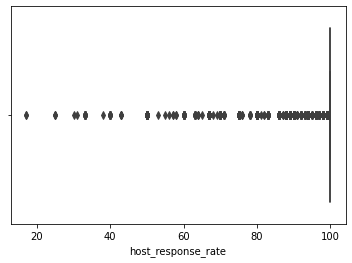

In [ ]:
sns.boxplot(data["host_response_rate"])

In [ ]:
data = data[data['host_since'].notna()]
#take the host_since without null values drop them in other words

In [ ]:
del data["review_scores_cleanliness"]


In [ ]:
del data["review_scores_value"]


In [ ]:
data = data[data['property_type'].notna()]
#take the property_type without null values drop them in other words

In [ ]:
data['bathrooms'].fillna(data['bathrooms'].mode()[0],inplace=True)
#bathrooms is a categorical data so i fill in the missing values with mode

In [ ]:
data = data[data['bedrooms'].notna()]
#drop null values

In [ ]:
data = data[data['review_scores_rating'].notna()]
#drop null values

In [ ]:
data.isnull().sum()

id                           0
host_since                   0
host_response_time           0
host_response_rate           0
host_is_superhost            0
host_listings_count          0
host_verifications           0
host_identity_verified       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
bed_type                     0
amenities                    0
price                        0
guests_included              0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
extra_people                 0
cleaning_fee               757
security_deposit          1558
dtype: int64

In [ ]:
data['cleaning_fee'] = data['cleaning_fee'].str.replace('%', '').str.replace('$', '').astype(float)
#delete the $ sign

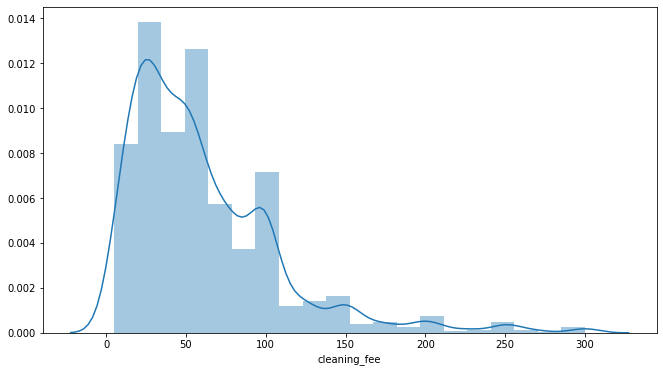

In [ ]:
#look at its distribution
plt.figure(figsize=(11,6))
sns.distplot(data["cleaning_fee"],bins=20)

In [ ]:
data['cleaning_fee'].fillna(data['cleaning_fee'].mean(),inplace=True)
#fill the null values with mean as they it is a numerical value 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3165 entries, 0 to 3814
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      3165 non-null   int64         
 1   host_since              3165 non-null   datetime64[ns]
 2   host_response_time      3165 non-null   float64       
 3   host_response_rate      3165 non-null   float64       
 4   host_is_superhost       3165 non-null   object        
 5   host_listings_count     3165 non-null   float64       
 6   host_verifications      3165 non-null   object        
 7   host_identity_verified  3165 non-null   object        
 8   latitude                3165 non-null   float64       
 9   longitude               3165 non-null   float64       
 10  property_type           3165 non-null   object        
 11  room_type               3165 non-null   object        
 12  accommodates            3165 non-null   int64   

In [ ]:
data.isnull().sum()

id                           0
host_since                   0
host_response_time           0
host_response_rate           0
host_is_superhost            0
host_listings_count          0
host_verifications           0
host_identity_verified       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
bed_type                     0
amenities                    0
price                        0
guests_included              0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
extra_people                 0
cleaning_fee                 0
security_deposit          1558
dtype: int64

In [ ]:
del data["security_deposit"]
#half the data is empty

In [ ]:
num_data=data.select_dtypes(include=[np.number])
#select the numerical data

In [ ]:
cat_data=data.select_dtypes(include=[np.object])
#select only categorical columns

In [ ]:
cat_data.columns

Index(['host_is_superhost', 'host_verifications', 'host_identity_verified',
       'property_type', 'room_type', 'bed_type', 'amenities',
       'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [ ]:
missing=cat_data.isnull().sum()
missing

host_is_superhost         0
host_verifications        0
host_identity_verified    0
property_type             0
room_type                 0
bed_type                  0
amenities                 0
instant_bookable          0
cancellation_policy       0
dtype: int64

In [ ]:
cat_data.head()

,host_is_superhost,host_verifications,host_identity_verified,property_type,room_type,bed_type,amenities,instant_bookable,cancellation_policy
0,f,"['email', 'phone', 'reviews', 'kba']",t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",f,moderate
1,t,"['email', 'phone', 'facebook', 'linkedin', 're...",t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",f,strict
2,f,"['email', 'phone', 'google', 'reviews', 'jumio']",t,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",f,strict
4,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",f,strict
5,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,House,Private room,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",f,strict


In [ ]:
data.isnull().sum()

id                        0
host_since                0
host_response_time        0
host_response_rate        0
host_is_superhost         0
host_listings_count       0
host_verifications        0
host_identity_verified    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
bed_type                  0
amenities                 0
price                     0
guests_included           0
review_scores_rating      0
instant_bookable          0
cancellation_policy       0
extra_people              0
cleaning_fee              0
dtype: int64

The first data set is clean

In [ ]:
calendar=pd.read_csv('calendar.csv')

In [ ]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [ ]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [ ]:
calendar_clean = calendar.dropna()
#drop the null values froom the whole data

In [ ]:
calendar_clean['month']=calendar_clean['date'].apply(lambda x: x.split("-")[1]).astype(str)
calendar_clean.head()
#get the month from the dataset for further vizualizations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,01
1,241032,2016-01-05,t,$85.00,01
9,241032,2016-01-13,t,$85.00,01
10,241032,2016-01-14,t,$85.00,01
14,241032,2016-01-18,t,$85.00,01


In [ ]:
calendar_clean.tail()

,listing_id,date,available,price,month
1393207,10208623,2016-01-06,t,$87.00,01
1393208,10208623,2016-01-07,t,$87.00,01
1393211,10208623,2016-01-10,t,$87.00,01
1393212,10208623,2016-01-11,t,$87.00,01
1393213,10208623,2016-01-12,t,$87.00,01


In [ ]:
#replace numbers with month names
calendar_clean.month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
calendar_clean.isnull().sum()

listing_id    0
date          0
available     0
price         0
month         0
dtype: int64

In [ ]:
calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  934542 non-null  int64 
 1   date        934542 non-null  object
 2   available   934542 non-null  object
 3   price       934542 non-null  object
 4   month       934542 non-null  object
dtypes: int64(1), object(4)
memory usage: 42.8+ MB


In [ ]:
calendar_clean['price'] = calendar_clean['price'].str.replace(',', '').str.replace('$', '').astype(float)
#there are no null vlaues but the price column has imperfections

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
del data['price']
#delete the column price from "data" dataset


## Question 1. Predictive Analysis: Predict the price.

In [ ]:
sum_df = calendar_clean.groupby(['listing_id','month'],as_index=False).agg({'price': 'mean'})
sum_df
#get the mean price per month for each listing

,listing_id,month,price
0,3335,Apr,120.0
1,3335,Aug,120.0
2,3335,Dec,120.0
3,3335,Feb,120.0
4,3335,Jan,120.0
...,...,...,...
33934,10340165,Mar,43.0
33935,10340165,May,43.0
33936,10340165,Nov,43.0
33937,10340165,Oct,43.0


In [ ]:
data.rename(columns = {"id" : "listing_id"}, inplace = True)
#rename the column for further merging

In [ ]:
df = pd.merge(sum_df, data, on='listing_id')
#merge the datasets

In [ ]:
df.head()

,listing_id,month,price,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,guests_included,review_scores_rating,instant_bookable,cancellation_policy,extra_people,cleaning_fee
0,4291,Apr,82.0,2009-09-02,3.0,100.0,f,6.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,47.687251,-122.31313,House,Private room,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F...",1,92.0,f,moderate,0.0,30.0
1,4291,Aug,82.0,2009-09-02,3.0,100.0,f,6.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,47.687251,-122.31313,House,Private room,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F...",1,92.0,f,moderate,0.0,30.0
2,4291,Dec,82.0,2009-09-02,3.0,100.0,f,6.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,47.687251,-122.31313,House,Private room,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F...",1,92.0,f,moderate,0.0,30.0
3,4291,Feb,82.0,2009-09-02,3.0,100.0,f,6.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,47.687251,-122.31313,House,Private room,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F...",1,92.0,f,moderate,0.0,30.0
4,4291,Jan,82.0,2009-09-02,3.0,100.0,f,6.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,47.687251,-122.31313,House,Private room,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F...",1,92.0,f,moderate,0.0,30.0


In [ ]:
cat_data2=df.select_dtypes(include=[np.object])
num_data2=df.select_dtypes(include=[np.number])
#cat and numercial columns of the new dataset

In [ ]:
cat_data2.columns

Index(['month', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'property_type', 'room_type', 'bed_type',
       'amenities', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [ ]:
dummies=pd.get_dummies(cat_data2)
#change them into numerical data for ML model

In [ ]:
final_data = pd.concat([num_data2, dummies], axis=1,sort=False)


In [ ]:
final_data.head()

,listing_id,price,host_response_time,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,guests_included,review_scores_rating,extra_people,cleaning_fee,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,host_is_superhost_f,host_is_superhost_t,"host_verifications_['email', 'facebook', 'reviews', 'jumio']","host_verifications_['email', 'facebook', 'reviews', 'kba']","host_verifications_['email', 'facebook', 'reviews']","host_verifications_['email', 'linkedin', 'reviews', 'jumio']","host_verifications_['email', 'phone', 'facebook', 'amex', 'reviews', 'jumio']","host_verifications_['email', 'phone', 'facebook', 'amex', 'reviews', 'kba']","host_verifications_['email', 'phone', 'facebook', 'google', 'amex', 'reviews', 'jumio']","host_verifications_['email', 'phone', 'facebook', 'google', 'linkedin', 'amex', 'reviews', 'jumio']","host_verifications_['email', 'phone', 'facebook', 'google', 'linkedin', 'amex', 'reviews', 'kba']","host_verifications_['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio', 'kba']","host_verifications_['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']","host_verifications_['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'kba', 'photographer']",...,"amenities_{TV,Internet,""Wireless Internet"",Kitchen,Heating,Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials}","amenities_{TV,Internet,""Wireless Internet"",Kitchen,Heating,Washer,Dryer,""Smoke Detector"",""Fire Extinguisher"",Essentials,Shampoo}","amenities_{TV,Internet,""Wireless Internet"",Kitchen,Heating,Washer,Dryer,""Smoke Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}","amenities_{TV,Internet,""Wireless Internet"",Kitchen,Heating,Washer,Dryer,""Smoke Detector"",""First Aid Kit"",Essentials,Shampoo}","amenities_{TV,Internet,""Wireless Internet"",Kitchen,Heating,Washer,Dryer,""Smoke Detector"",Essentials}","amenities_{TV,Internet,""Wireless Internet"",Kitchen,Heating,Washer,Dryer,""Smoke Detector""}","amenities_{TV,Internet,""Wireless Internet"",Kitchen,Heating,Washer,Dryer,Essentials,Shampoo}","amenities_{TV,Internet,""Wireless Internet"",Pool,Kitchen,""Free Parking on Premises"",""Smoking Allowed"",""Pets Allowed"",Gym,""Pets live on this property"",""Hot Tub"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}","amenities_{TV,Internet,""Wireless Internet"",Pool,Kitchen,""Free Parking on Premises"",""Smoking Allowed"",Gym,""Elevator in Building"",""Hot Tub"",""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Fire Extinguisher"",Essentials,Shampoo}","amenities_{TV,Internet,""Wireless Internet"",Pool,Kitchen,""Free Parking on Premises"",Breakfast,""Elevator in Building"",Heating,Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",Essentials,Shampoo,Hangers,""Hair Dryer"",Iron,""Laptop Friendly Workspace""}","amenities_{TV,Internet,""Wireless Internet"",Pool,Kitchen,""Pets live on this property"",""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}","amenities_{TV,Internet,""Wireless Internet"",Pool,Kitchen,""Smoking Allowed"",Doorman,Gym,""Elevator in Building"",""Hot Tub"",Heating,Washer,Dryer,""Smoke Detector"",""Fire Extinguisher"",Essentials,Shampoo}","amenities_{TV,Internet,""Wireless Internet"",Pool,Kitchen,Doorman,Gym,""Elevator in Building"",""Hot Tub"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo,""24-Hour Check-in"",Hangers,""Hair Dryer"",Iron,""Laptop Friendly Workspace""}","amenities_{TV,Internet,""Wirele

In [ ]:
final_data['price']

0        82.0
1        82.0
2        82.0
3        82.0
4        82.0
         ... 
28617    70.0
28618    22.0
28619    20.0
28620    22.0
28621    22.0
Name: price, Length: 28622, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
y = final_data['price'].values
y=y.reshape(-1,1)
x=final_data.loc[:, final_data.columns != 'price']
scaler=StandardScaler()
scaler.fit(y)
transformed=scaler.transform(y)
# the columns are different in scale that is why i applied standart scaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
#split the dataset into train and test

In [ ]:
#Random Forest
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=1000, 
                               n_jobs=-1,verbose=1)
forest.fit(X_train, y_train.squeeze())

# scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

#R²value
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished


Random Forest R^2 train: 0.993, test: 0.950


R^2 is 0.993 so it has 99 accuracy with random forest on train and 95% of the test dataset

## Descriptive Statistics

### Question 2 Which are the columns the most correlated to the price?

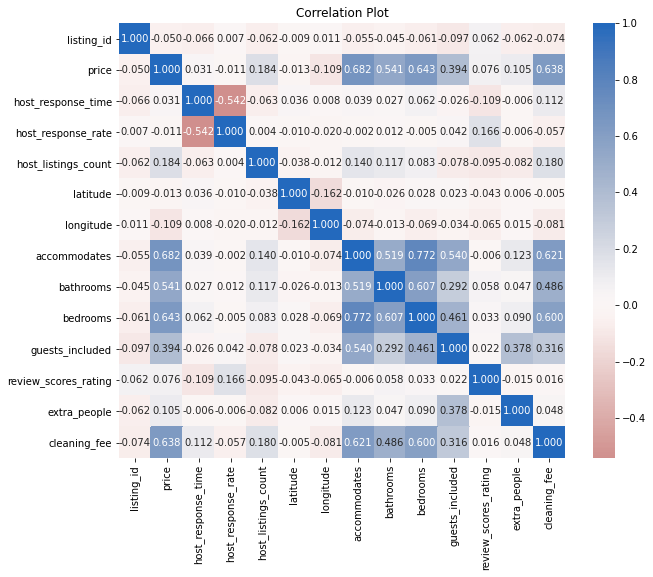

In [ ]:
# correlation plot
plt.figure(figsize = [10, 8])
sns.heatmap(num_data2.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

As it can be seen from the heatmap the columns  having an influence on the 'price' column are:'cleaning_fee','guests_inluding','bedrooms','bathrooms','accomodates'

In [ ]:
cat_data2.columns

Index(['month', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'property_type', 'room_type', 'bed_type',
       'amenities', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

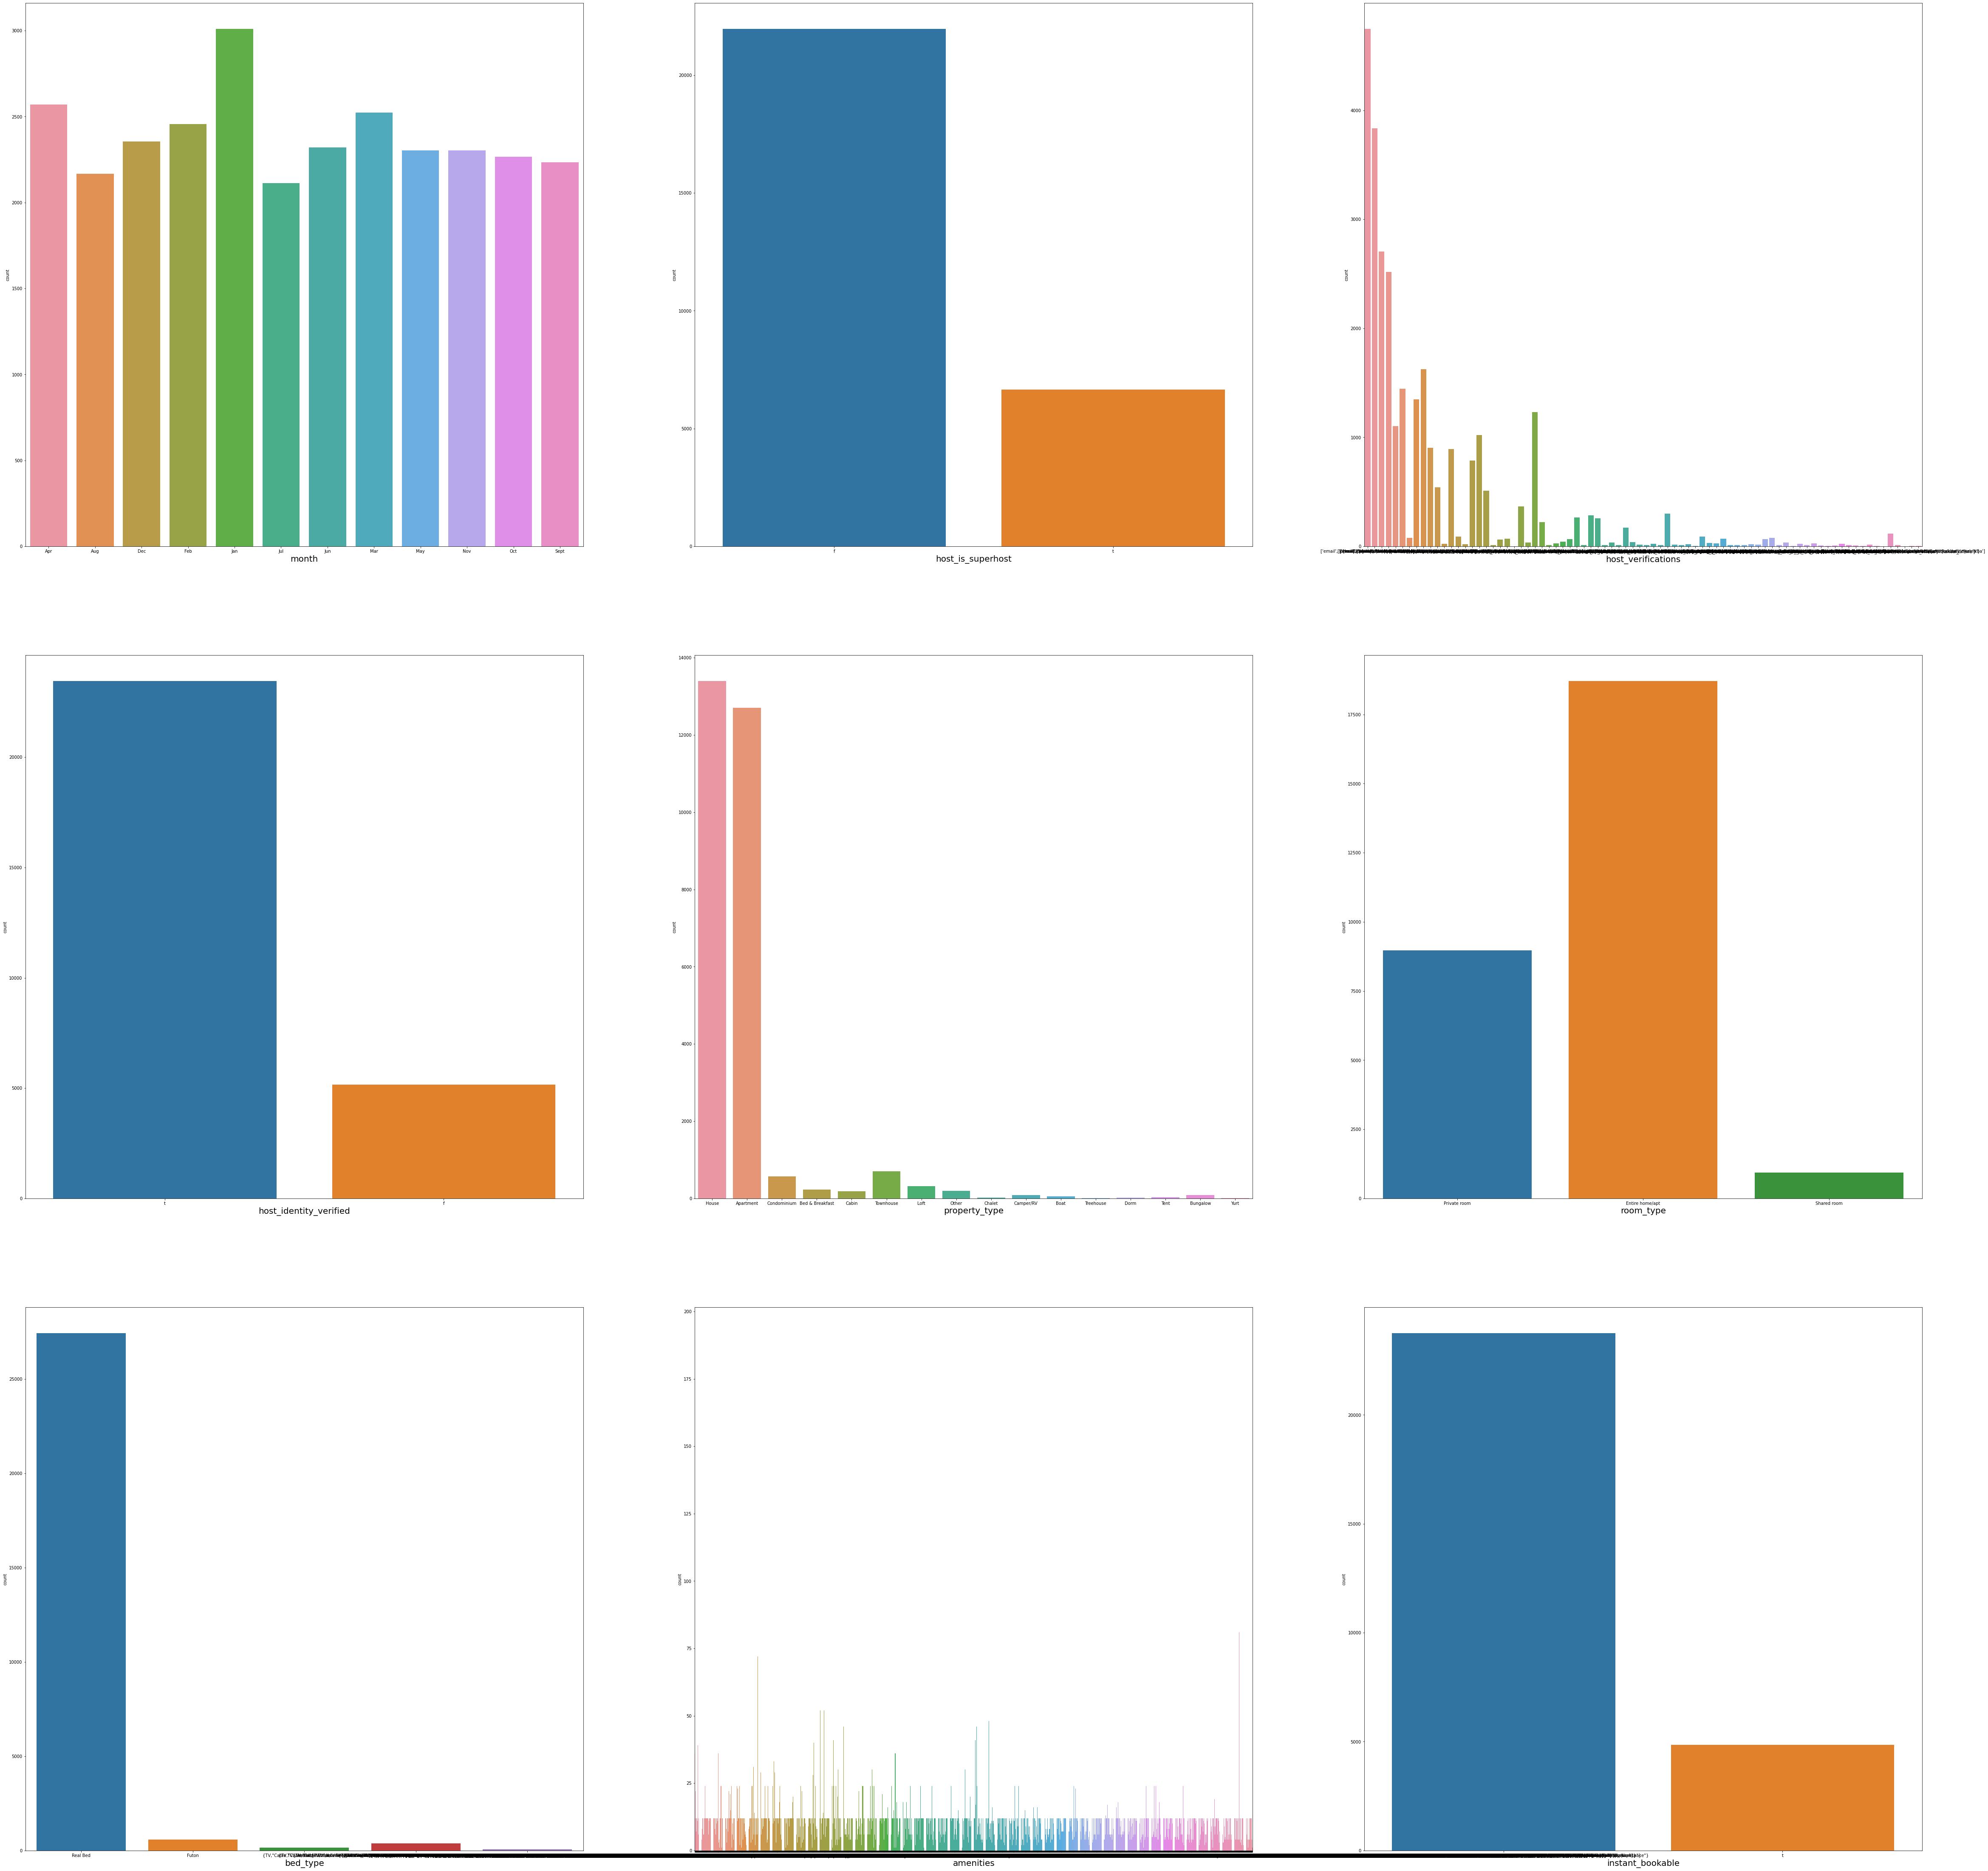

In [ ]:
plt.figure(figsize=(80,80), facecolor='white') #figure size
data=cat_data2
plotnumber = 1
column=[]
for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

This function helps to see the countplots of the categorical data. for some COLUMNS it is impossible to understand the countp lots because they have many data values like in 'amenties' or 'host verification'. But It is clear people take houses mostly in january, they prefer instant bookable rooms and that most hosts have their identifications verified. It is clear also that most of the hosts are superhosts. It is also clear that people mostly take the entire homes rather than rooms. Shared rooms are the less preferabel.

## Question 3. How much is the average price over time ? How does it change ?

In [ ]:
other = calendar_clean.groupby(['date'],as_index=False).agg({'price': 'mean'})
other

,date,price
0,2016-01-04,122.085879
1,2016-01-05,120.681307
2,2016-01-06,120.928258
3,2016-01-07,120.958896
4,2016-01-08,127.640853
...,...,...
360,2016-12-29,138.045503
361,2016-12-30,144.738380
362,2016-12-31,145.698146
363,2017-01-01,138.126968


In [ ]:
other["date"]=pd.to_datetime(other["date"])

In [ ]:
other['rolling_mean'] = other['price'].rolling(window=12).mean()


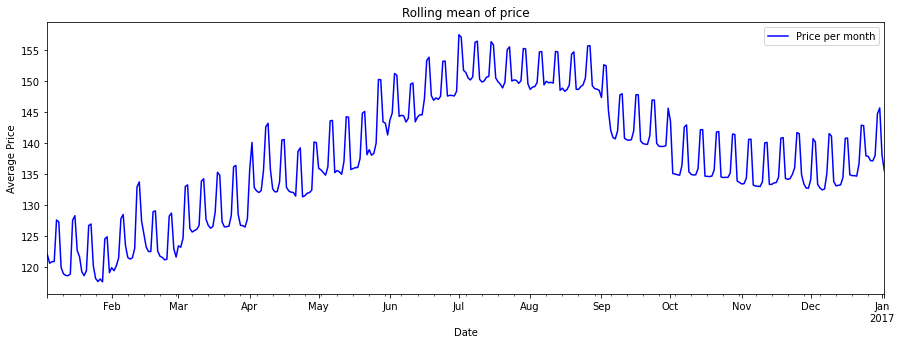

In [ ]:
fig = plt.figure(figsize=(15, 5))

ax = plt.gca()

other.plot(kind='line', x='date', y='price', color='blue', label='Price per month', ax=ax)
ax.set_ylabel('Average Price')
ax.set_xlabel('Date')
ax.set_title("Rolling mean of price")

plt.show()

From June to September the prices are at their highest. And we can notice that the prices in January 2017 are also higher as compared to that of 2016.In autumn 2016 the price is somewhat more stable and does not have abrupt changes.

## Question 4. Which are the most expensive property types ?


<Figure size 1080x720 with 0 Axes>

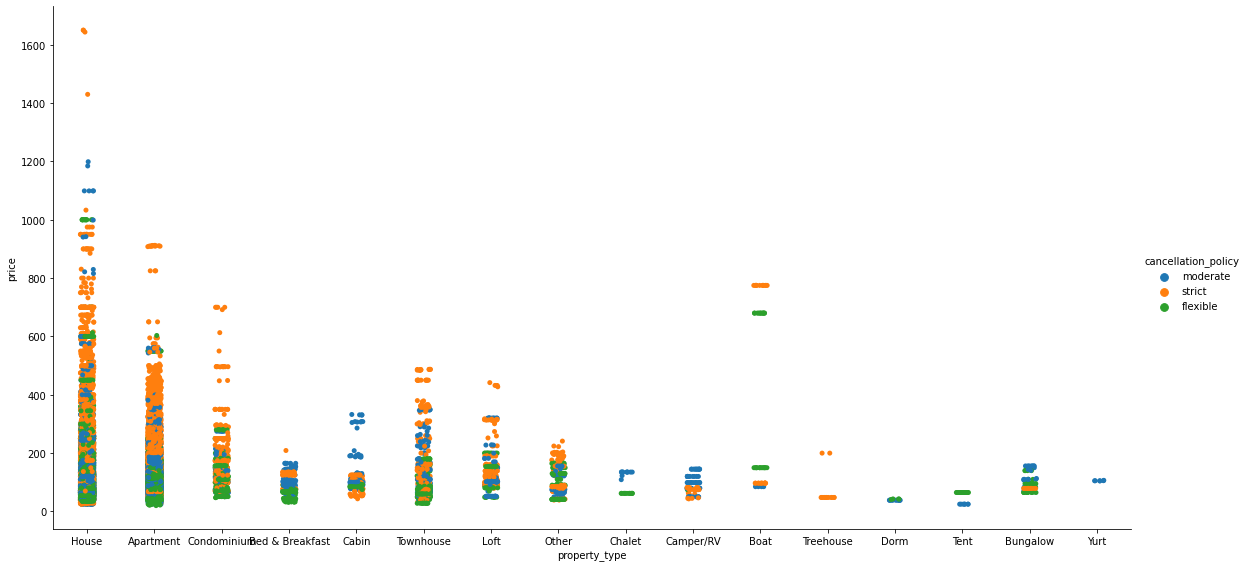

In [ ]:
plt.figure(figsize=[15, 10])
sns.catplot(x="property_type", y="price", data=df,height=8,aspect=2,hue='cancellation_policy')

Among the property types the houses and apartments are the most expensive.The Yurts, Dorms and Treehouses are the least expensive.Most of the houses and the appartments have strict  cancellation policies,tree houses have only strict cancellation rules and tents and dorms are having the most flexible cancellation rules.

## Question 5. Do the price and host response rate influence the instant bookable policy ?

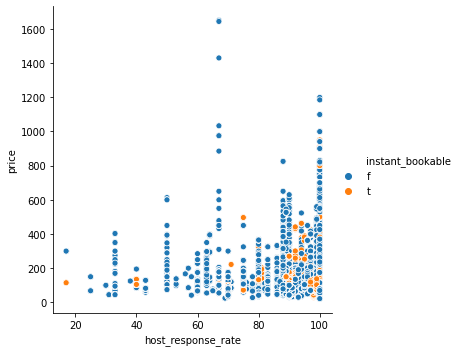

In [ ]:

sns.relplot(x="host_response_rate", y="price",hue="instant_bookable",data=df)

We can see that the most of them are not instant bookable. The instant bookables have more host response rate(75-100) and they have a price <600